In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import cosima_cookbook as cc
from collections import OrderedDict
from dask.distributed import Client
import matplotlib.path as mpath

import matplotlib.pyplot as plt
import cmocean.cm as cmo
import matplotlib.colors as col
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter
import matplotlib.ticker as mticker

In [2]:
plt.rcParams['figure.dpi'] = 96
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["lines.linewidth"] = 1.5
plt.rcParams["lines.markersize"] = 3
plt.rcParams['hatch.color'] = 'k'
plt.rcParams["savefig.facecolor"] = 'white'

In [3]:
data_old = [[1990.964286, 1991.982143, 1992.982143, 1993.964286, 1994.946429,
             1995.982143, 1996.964286, 1997.982143, 1999, 1999.964286,
             2000.982143, 2002.821429, 2003.982143, 2004.910714, 2005.964286,
             2007.035714, 2007.946429, 2009],
            [8.211627907, 7.902325581, 7.397674419, 7.218604651, 6.876744186,
             6.518604651, 5.655813953, 5.053488372, 4.174418605, 3.653488372,
             3.197674419, 2.546511628, 1.993023256, 1.537209302, 1.081395349,
             0.804651163, 0.674418605, 0.495348837]]

In [4]:
data_small = [[1990.9464285714287, 1991.9464285714287, 1992.982142857143, 1993.9642857142858,
               1994.9642857142858, 1996, 1996.9107142857142, 1997.98214285714],
              [8.211627906976744, 7.120930232558139, 7.088372093023256, 7.47906976744186,
               6.876744186046512, 6.941860465116279, 6.551162790697674, 6.144186046511628]]

In [5]:
data_large = [[1990.946429, 1991.946429, 1992.982143, 1993.982143, 1994.982143, 1995.964286,
               1996.982143, 1998, 1998.964286],
              [8.097674419, 7.251162791, 7.788372093, 8.358139535, 7.934883721, 7.755813953,
               7.495348837, 7.348837209, 7.218604651]]

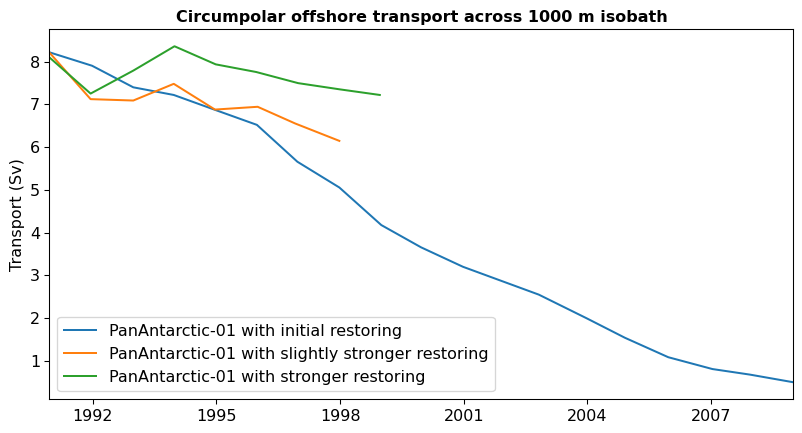

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(data_old[0], data_old[1], label='PanAntarctic-01 with initial restoring')
plt.plot(data_small[0], data_small[1], label='PanAntarctic-01 with slightly stronger restoring')
plt.plot(data_large[0], data_large[1], label='PanAntarctic-01 with stronger restoring')

plt.autoscale(enable=True, axis='x', tight=True)
plt.gca().xaxis.set_ticks(np.arange(1992, 2010, 3))
plt.legend()
plt.title('Circumpolar offshore transport across 1000 m isobath', fontweight='bold')
plt.ylabel('Transport (Sv)')
plt.show()

In [7]:
ds_topog = xr.open_dataset('/home/142/cs6673/work/panan-005/domain-tools/new_topog/topog.nc')
topog = ds_topog.depth
topog = topog.assign_coords(nx=ds_topog.geolon_t[0, :].values, ny=ds_topog.geolat_t[:, 0].values)

In [8]:
ds_topog_old = xr.open_dataset(
    '/home/142/cs6673/work/panan-005/domain-tools/topog_exchange_grid_with_bays_at_boundary/new_topog_37S.nc')
topog_old = ds_topog_old.depth
topog_old = topog_old.assign_coords(nx=ds_topog_old.geolon_t[0, :].values, ny=ds_topog_old.geolat_t[:, 0].values)

In [9]:
topog_01 = xr.open_dataset('/g/data/ik11/inputs/mom6/panan/01deg/20230404/ocean_topog.nc').depth
ds_grid_01 = xr.open_dataset('/g/data/ik11/inputs/mom6/panan/01deg/20230404/ocean_hgrid.nc')
topog_01 = topog_01.assign_coords(nx=ds_grid_01.x[0, :-1:2].values, ny=ds_grid_01.y[:-1:2, 0].values)

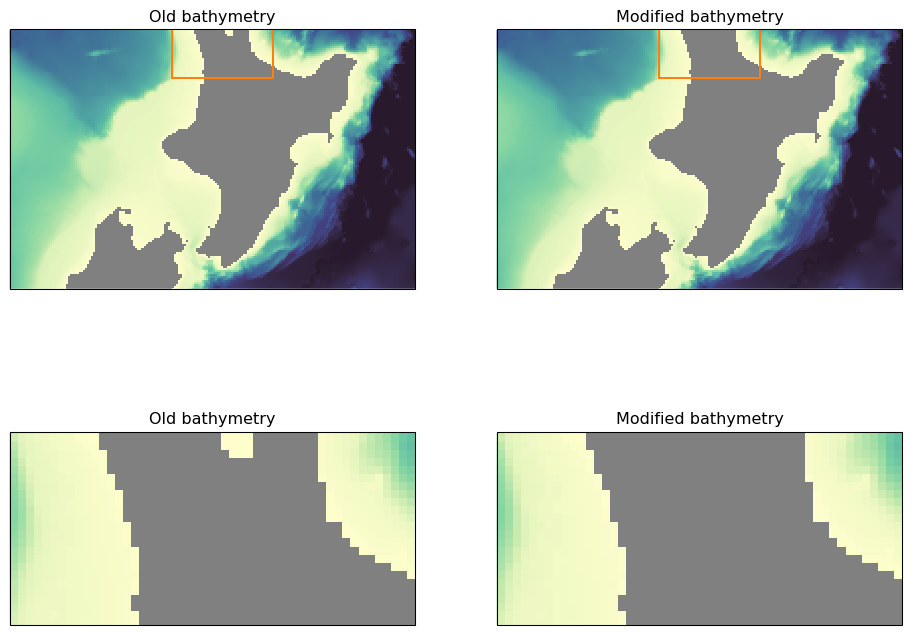

In [10]:
cmap = plt.cm.get_cmap(cmo.deep)
cmap.set_under('grey')

fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(wspace=0.2, hspace=0)

proj = ccrs.PlateCarree()

ax = plt.subplot(2, 2, 1, projection=ccrs.Mercator(
        central_longitude=180,
        min_latitude=-42, max_latitude=-37,
        latitude_true_scale=-40))
ax.set_extent([-190, -180, -42, -37.05], proj)

p = ax.pcolormesh(topog_old.nx, topog_old.ny,
                  topog_old.where(np.isnan(topog_old) == False, -10),
                  vmin=0, vmax=3000, cmap=cmo.deep, transform=proj)
plt.plot([-186, -186, -183.5, -183.5, -186], [-38, -37.05, -37.05, -38, -38],
         color='tab:orange', transform=proj)
plt.title('Old bathymetry')

ax = plt.subplot(2, 2, 2, projection=ccrs.Mercator(
        central_longitude=180,
        min_latitude=-42, max_latitude=-37,
        latitude_true_scale=-40))
ax.set_extent([-190, -180, -42, -37.05], proj)

p = ax.pcolormesh(topog.nx, topog.ny,
                  topog.where(np.isnan(topog) == False, -10),
                  vmin=0, vmax=3000, cmap=cmo.deep, transform=proj)
plt.plot([-186, -186, -183.5, -183.5, -186], [-38, -37.05, -37.05, -38, -38],
         color='tab:orange', transform=proj)
plt.title('Modified bathymetry')


ax = plt.subplot(2, 2, 3, projection=ccrs.Mercator(
        central_longitude=180,
        min_latitude=-42, max_latitude=-37,
        latitude_true_scale=-40))
ax.set_extent([-186, -183.5, -38, -37.05], proj)

p = ax.pcolormesh(topog_old.nx, topog_old.ny,
                  topog_old.where(np.isnan(topog_old) == False, -10),
                  vmin=0, vmax=3000, cmap=cmo.deep, transform=proj)
plt.title('Old bathymetry')


ax = plt.subplot(2, 2, 4, projection=ccrs.Mercator(
        central_longitude=180,
        min_latitude=-42, max_latitude=-37,
        latitude_true_scale=-40))
ax.set_extent([-186, -183.5, -38, -37.05], proj)

p = ax.pcolormesh(topog.nx, topog.ny,
                  topog.where(np.isnan(topog) == False, -10),
                  vmin=0, vmax=3000, cmap=cmo.deep, transform=proj)
plt.title('Modified bathymetry')

plt.show()

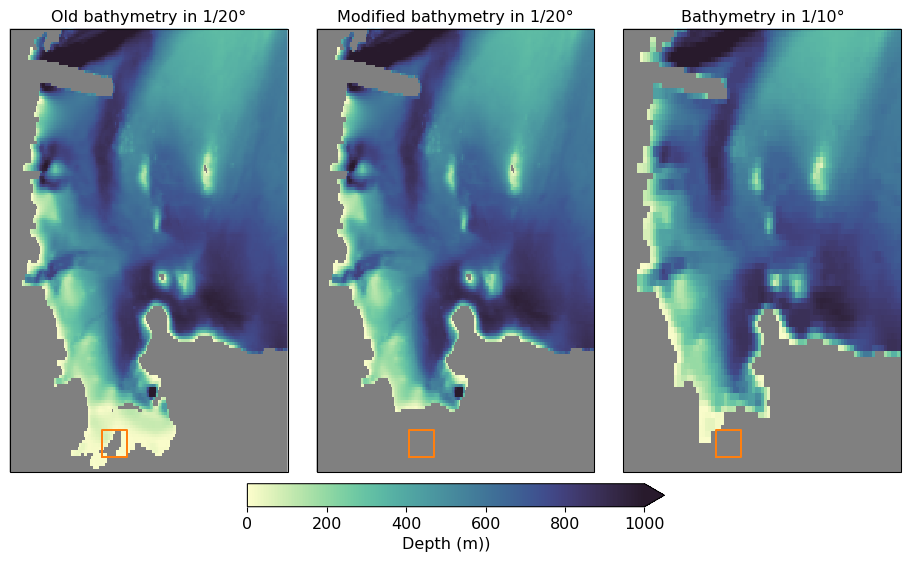

In [15]:
cmap = plt.cm.get_cmap(cmo.deep)
cmap.set_under('grey')

fig = plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.1, hspace=0)

proj = ccrs.PlateCarree()

ax = plt.subplot(1, 3, 1, projection=ccrs.Mercator(
        central_longitude=180,
        min_latitude=-79, max_latitude=-75,
        latitude_true_scale=-77))
ax.set_extent([-198, -189, -78.3, -75], proj)

p = ax.pcolormesh(topog_old.nx, topog_old.ny,
                  topog_old.where(np.isnan(topog_old) == False, -10),
                  vmin=0, vmax=1000, cmap=cmo.deep, transform=proj)
plt.plot([-195, -195, -194.2, -194.2, -195], [-78.2, -78.02, -78.02, -78.2, -78.2],
         color='tab:orange', transform=proj)
plt.title('Old bathymetry in 1/20°')


ax = plt.subplot(1, 3, 2, projection=ccrs.Mercator(
        central_longitude=180,
        min_latitude=-79, max_latitude=-75,
        latitude_true_scale=-77))
ax.set_extent([-198, -189, -78.3, -75], proj)

p = ax.pcolormesh(topog.nx, topog.ny,
                  topog.where(np.isnan(topog) == False, -10),
                  vmin=0, vmax=1000, cmap=cmo.deep, transform=proj)
plt.plot([-195, -195, -194.2, -194.2, -195], [-78.2, -78.02, -78.02, -78.2, -78.2],
         color='tab:orange', transform=proj)
plt.title('Modified bathymetry in 1/20°')

pos = ax.get_position()
cax = plt.axes([pos.xmin-.06, pos.ymin-0.06,
                1.5*(pos.xmax-pos.xmin), 0.04])
cb = plt.colorbar(p, cax=cax, orientation='horizontal', extend='max')
cb.ax.set_xlabel('Depth (m))')
    

ax = plt.subplot(1, 3, 3, projection=ccrs.Mercator(
        central_longitude=180,
        min_latitude=-79, max_latitude=-75,
        latitude_true_scale=-77))
ax.set_extent([-198, -189, -78.3, -75], proj)

p = ax.pcolormesh(topog_01.nx, topog_01.ny,
                  topog_01.where(np.isnan(topog_01) == False, -10),
                  vmin=0, vmax=1000, cmap=cmo.deep, transform=proj)
plt.plot([-195, -195, -194.2, -194.2, -195], [-78.2, -78.02, -78.02, -78.2, -78.2],
         color='tab:orange', transform=proj)
plt.title('Bathymetry in 1/10°')


plt.show()